#### in this project, more unusual methods and algorithms such as xgboost, sweetviz,... are used to diagnose cancer and it gives us a better view of data science tools in Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier as xgbc
import sweetviz as sv
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('cancerdata.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis']) # data['diagnosis'] = np.where(data['diagnosis']=='B',0,1)

In [9]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
x = data.iloc[:,1:]
y= data.iloc[:,0]

In [12]:
x_pre ,xt_pre , y_pre ,yt_pre = train_test_split(x,y,test_size=0.3)

In [13]:
xgb = xgbc(n_estimators=500,early_stopping_rounds=10,learning_rate=0.001)
xgb.fit(x,y,eval_set=[(x_pre ,y_pre),(xt_pre ,yt_pre)])

[0]	validation_0-logloss:0.65908	validation_1-logloss:0.66029
[1]	validation_0-logloss:0.65820	validation_1-logloss:0.65939
[2]	validation_0-logloss:0.65733	validation_1-logloss:0.65849
[3]	validation_0-logloss:0.65645	validation_1-logloss:0.65760
[4]	validation_0-logloss:0.65558	validation_1-logloss:0.65671
[5]	validation_0-logloss:0.65470	validation_1-logloss:0.65582
[6]	validation_0-logloss:0.65383	validation_1-logloss:0.65493
[7]	validation_0-logloss:0.65296	validation_1-logloss:0.65405
[8]	validation_0-logloss:0.65210	validation_1-logloss:0.65316
[9]	validation_0-logloss:0.65123	validation_1-logloss:0.65228
[10]	validation_0-logloss:0.65037	validation_1-logloss:0.65140
[11]	validation_0-logloss:0.64951	validation_1-logloss:0.65052
[12]	validation_0-logloss:0.64865	validation_1-logloss:0.64964
[13]	validation_0-logloss:0.64779	validation_1-logloss:0.64877
[14]	validation_0-logloss:0.64694	validation_1-logloss:0.64789
[15]	validation_0-logloss:0.64608	validation_1-logloss:0.64703
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
df = pd.DataFrame(data=xgb.feature_importances_ ,index=xgb.feature_names_in_,columns=['importance of features ']) ## feature selection
df[df['importance of features ']>= 0.01]

,importance of features
texture_mean,0.010304
concave points_mean,0.026786
texture_se,0.017203
concave points_se,0.015532
radius_worst,0.490100
texture_worst,0.015484
perimeter_worst,0.364870
concave points_worst,0.032131


In [15]:
columns= ['concave points_mean','texture_se','radius_worst','texture_worst','concave points_se','texture_mean','concave points_worst','perimeter_worst']

In [16]:
new_data = pd.DataFrame(data=data,columns=columns)
new_data = new_data.join(y)

In [17]:
new_data.head()

,concave points_mean,texture_se,radius_worst,texture_worst,concave points_se,texture_mean,concave points_worst,perimeter_worst,diagnosis
0,0.14710,0.9053,25.38,17.33,0.01587,10.38,0.2654,184.60,1
1,0.07017,0.7339,24.99,23.41,0.01340,17.77,0.1860,158.80,1
2,0.12790,0.7869,23.57,25.53,0.02058,21.25,0.2430,152.50,1
3,0.10520,1.1560,14.91,26.50,0.01867,20.38,0.2575,98.87,1
4,0.10430,0.7813,22.54,16.67,0.01885,14.34,0.1625,152.20,1


## EDA(Exploratory Data Analysis)

                                             |          | [  0%]   00:00 -> (? left)


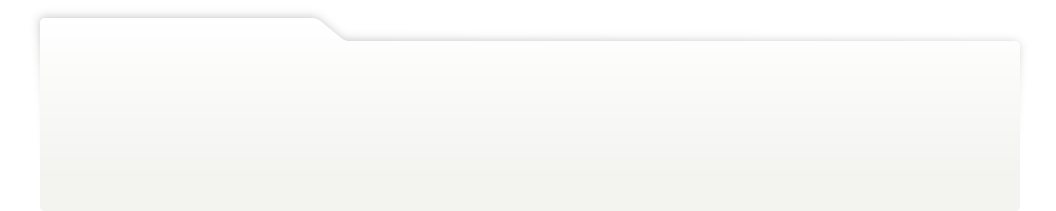
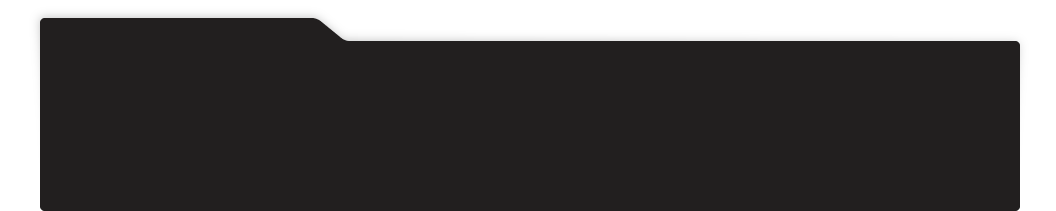
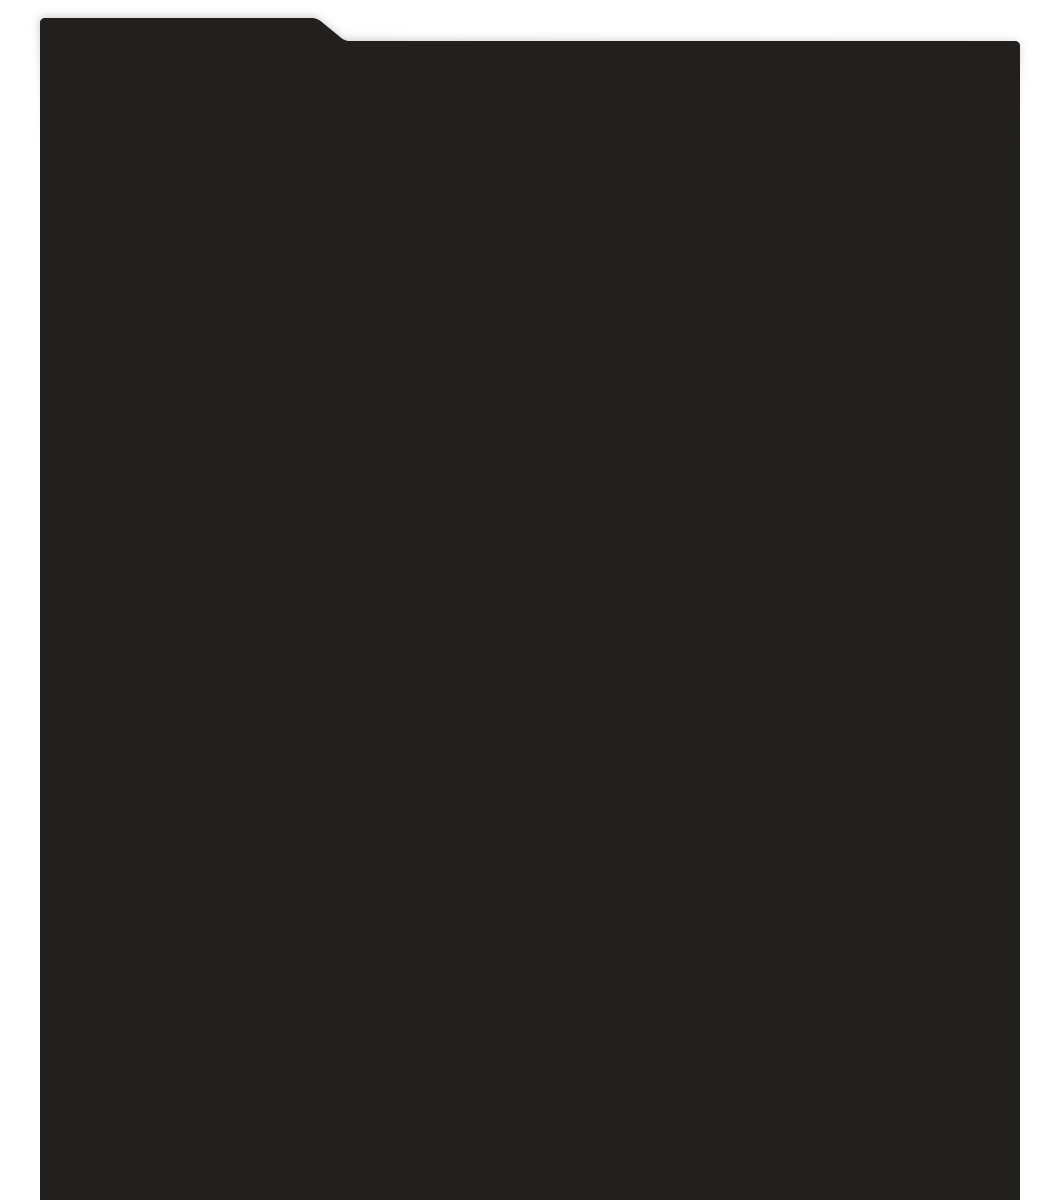
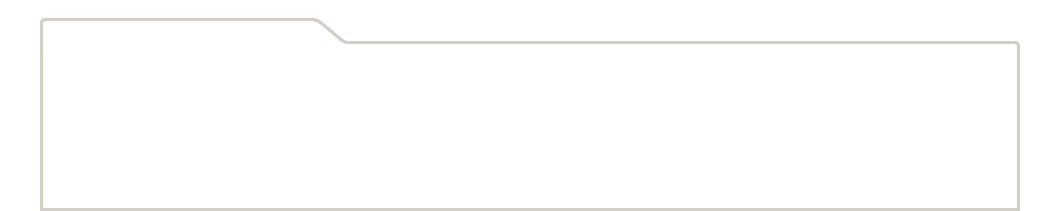
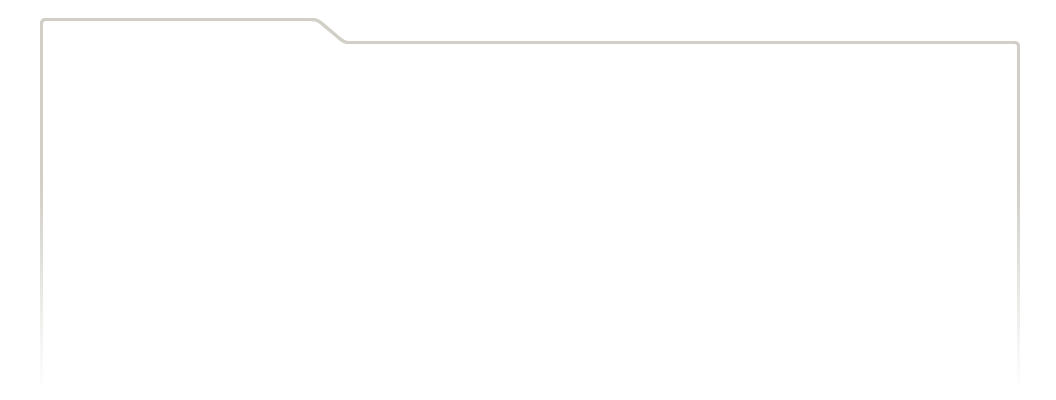
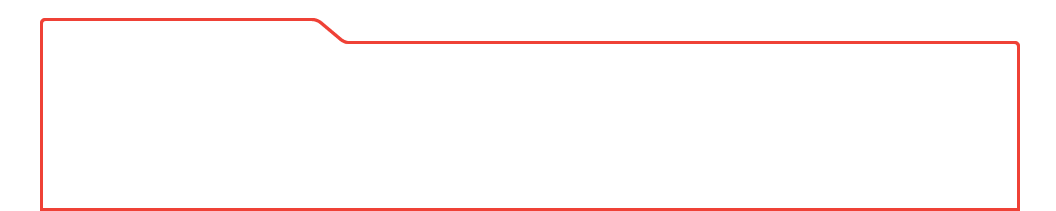
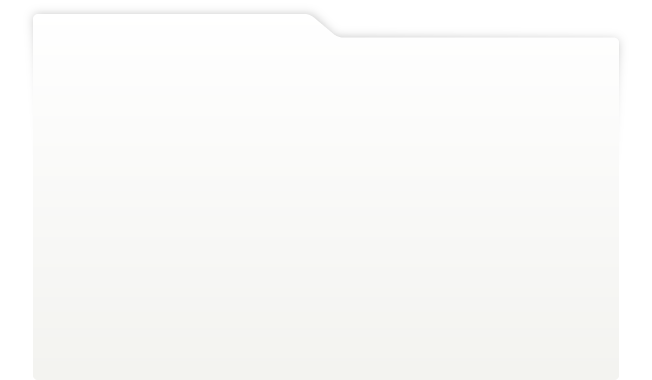
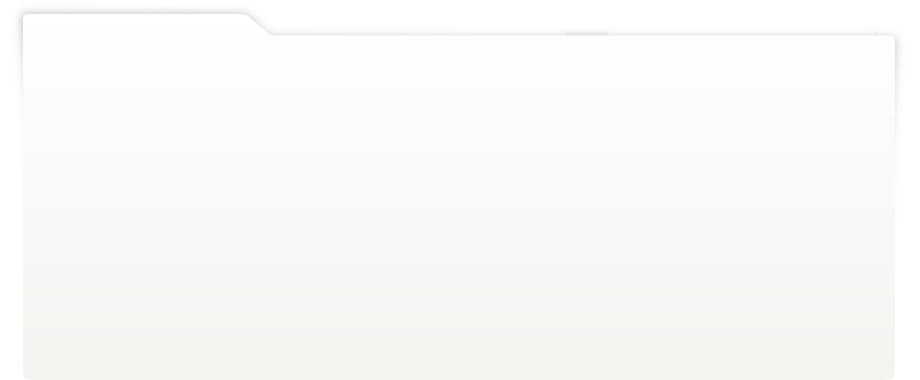
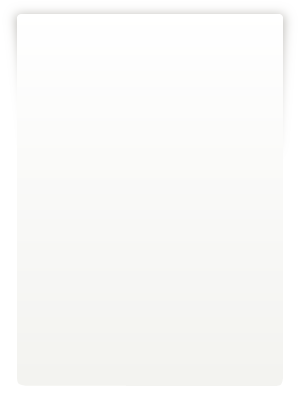
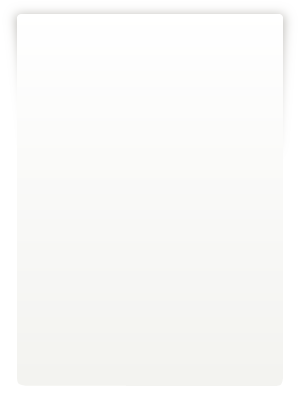
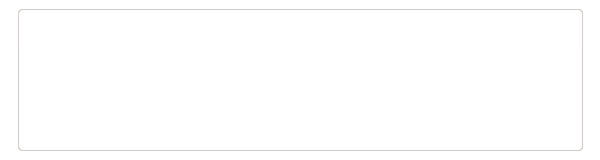
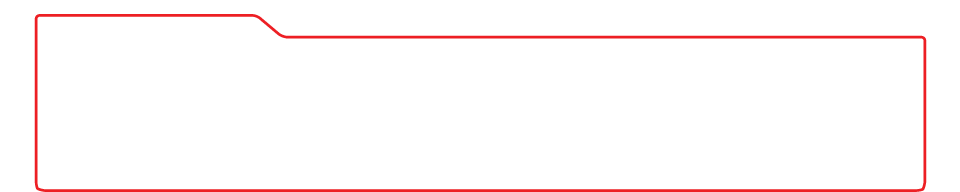
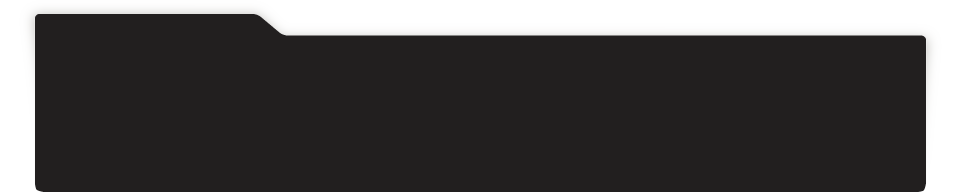
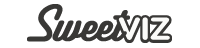
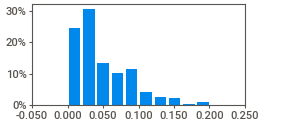
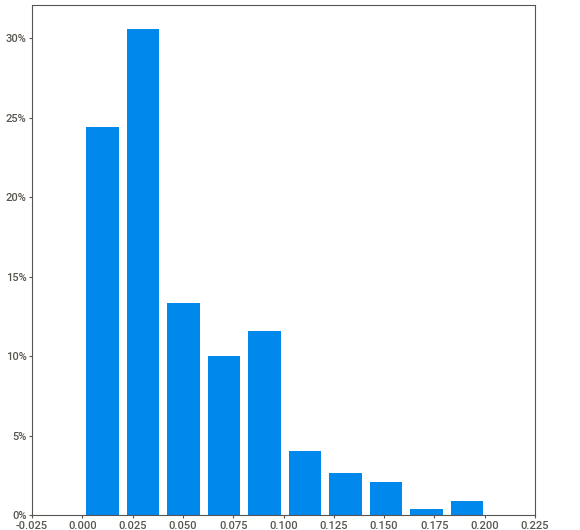
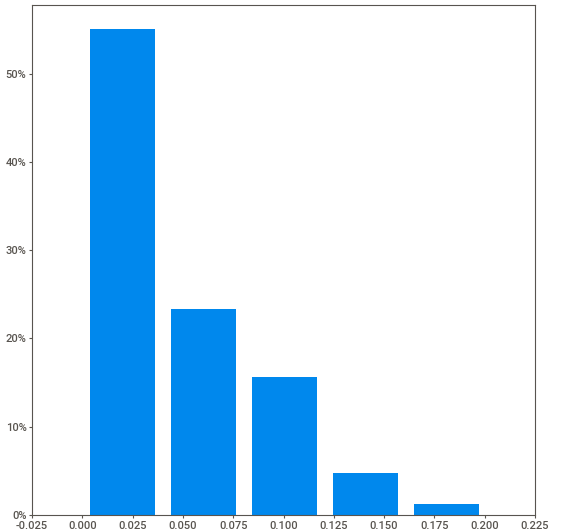
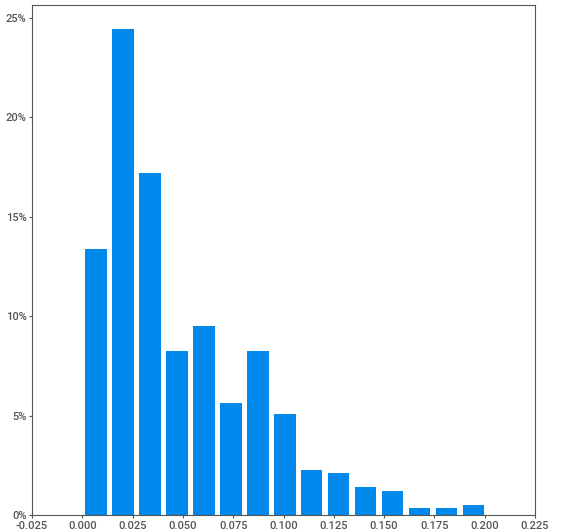
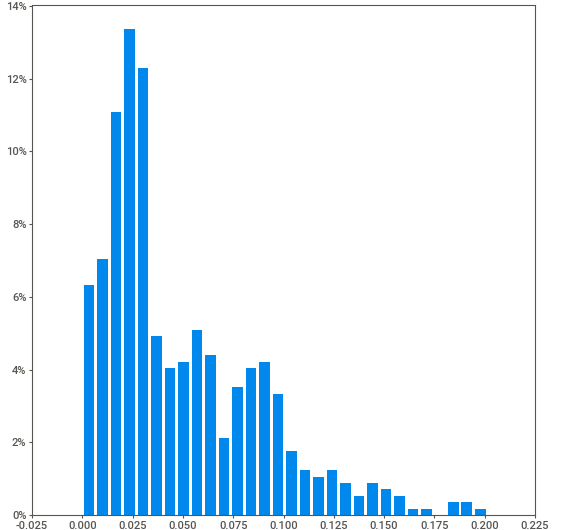
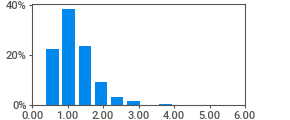
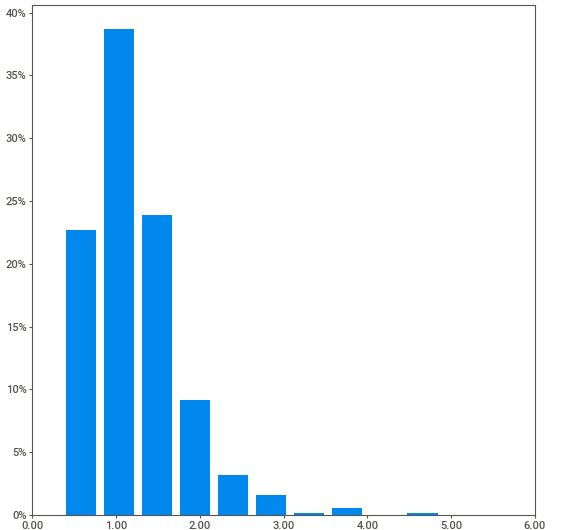
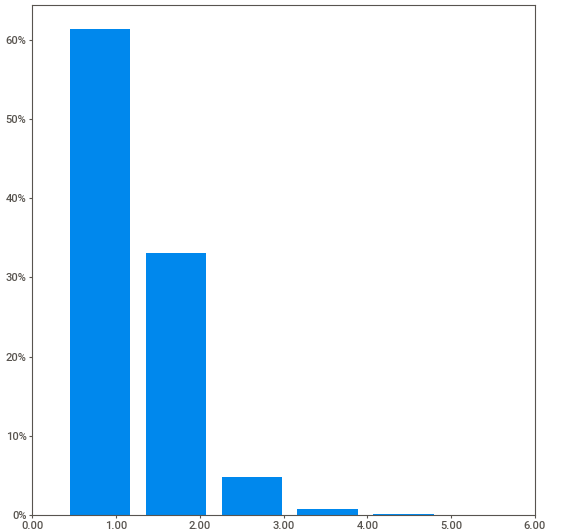
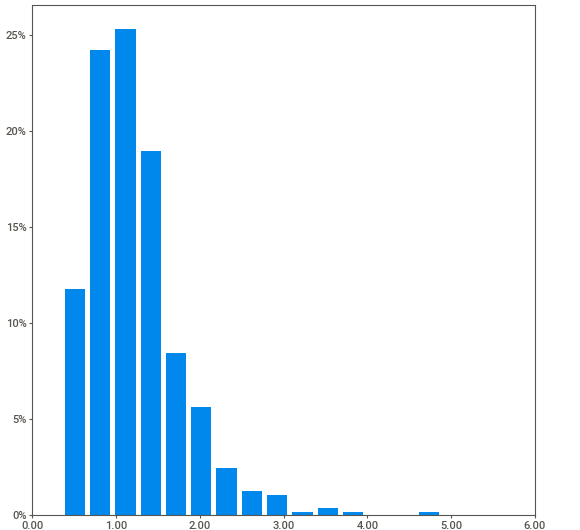
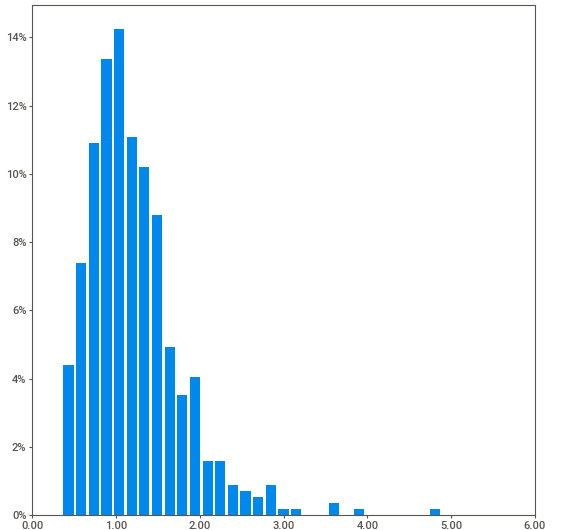
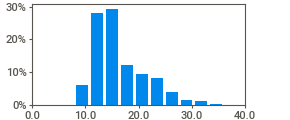
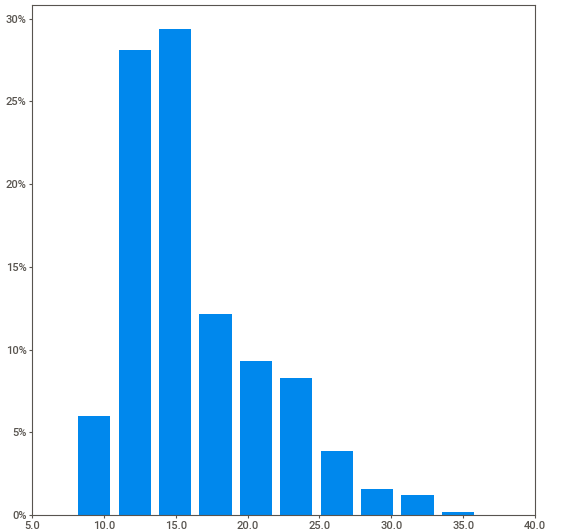
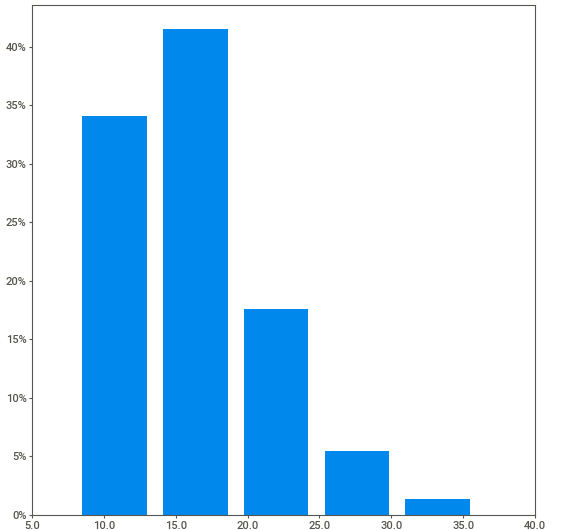
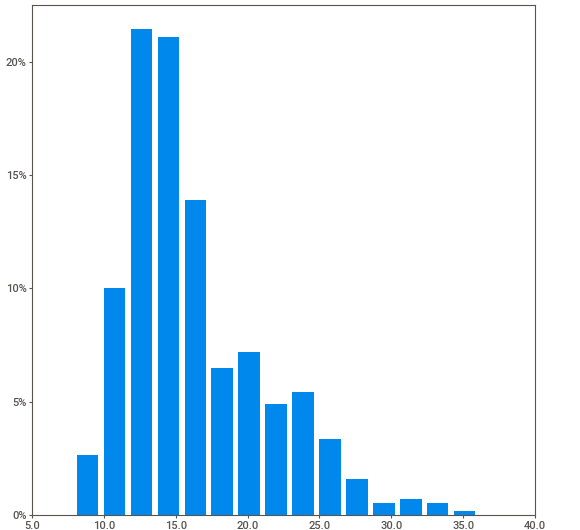
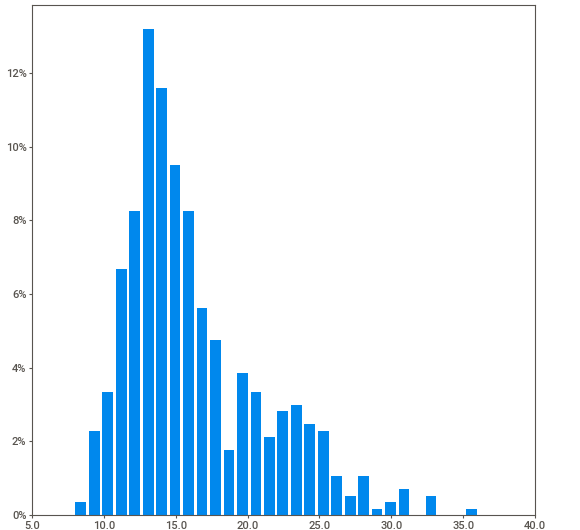
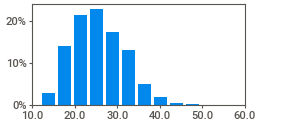
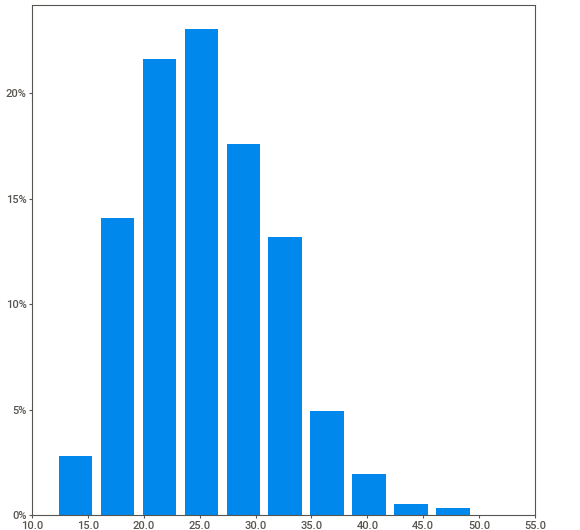
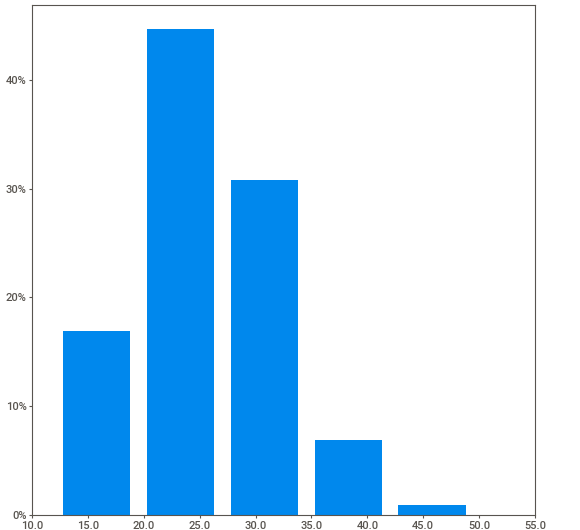
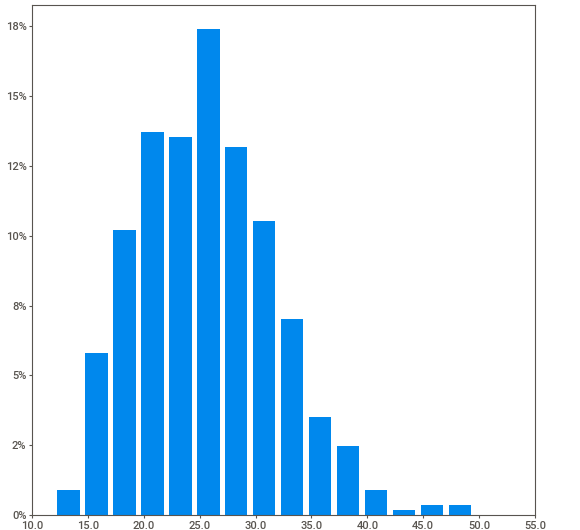
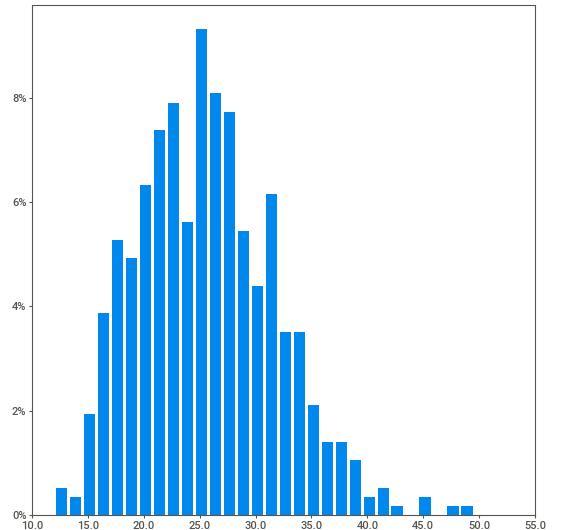
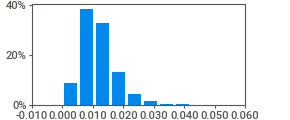
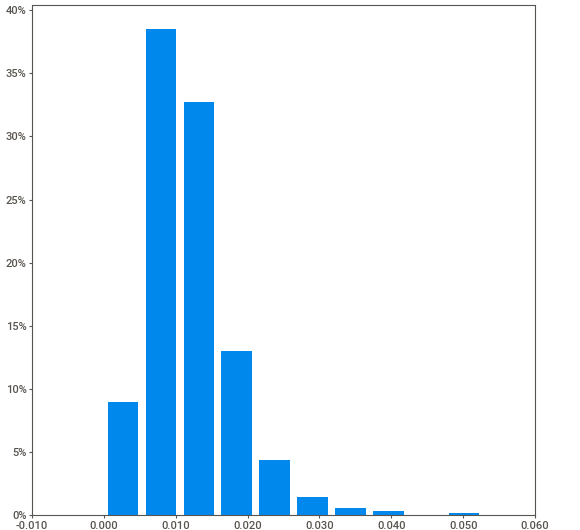
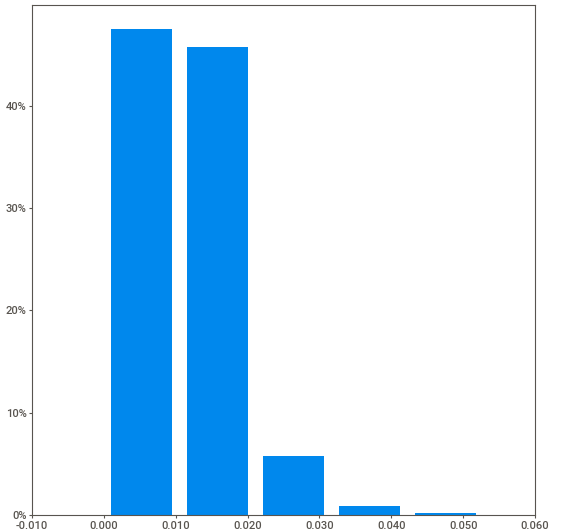
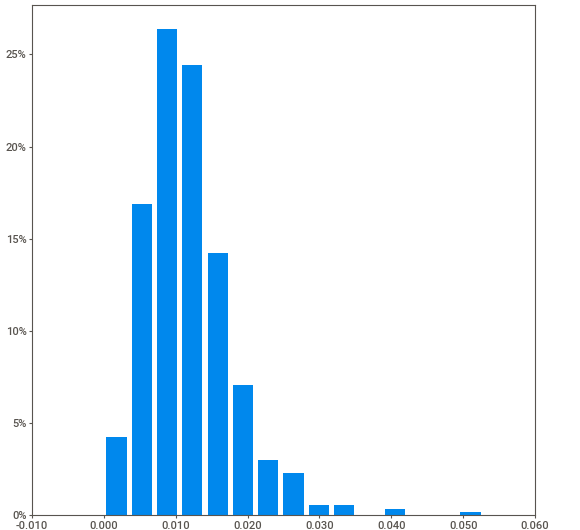
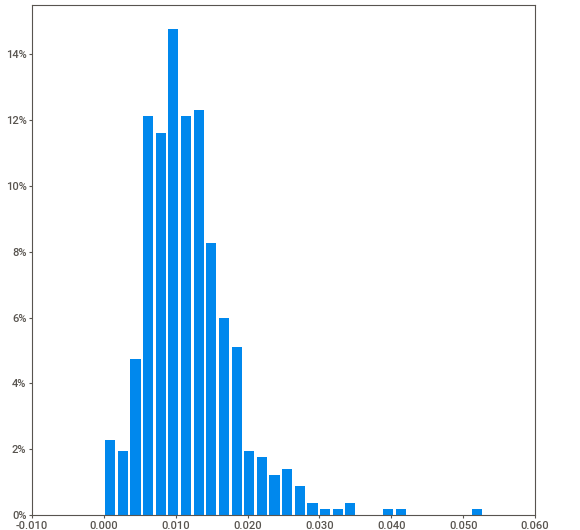
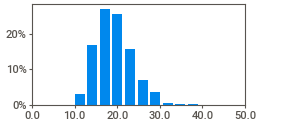
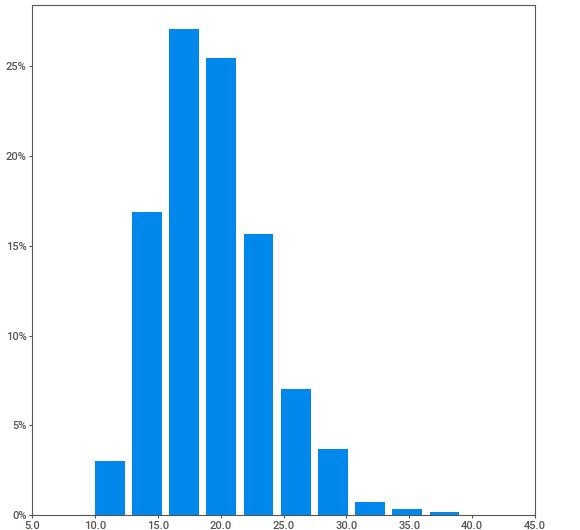
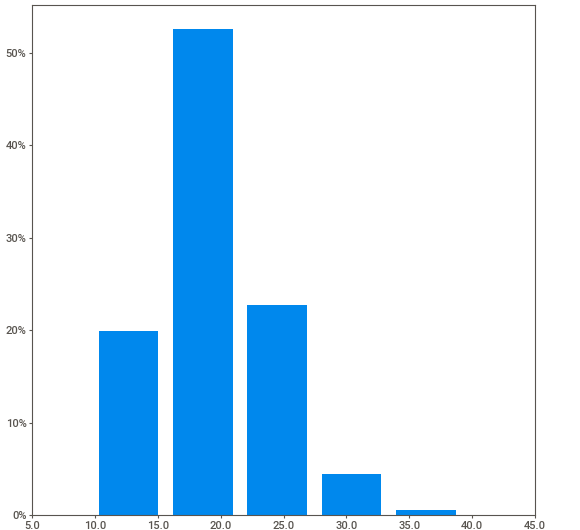
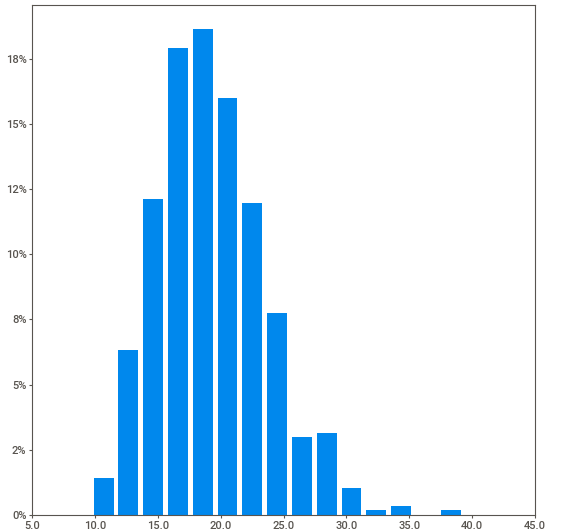
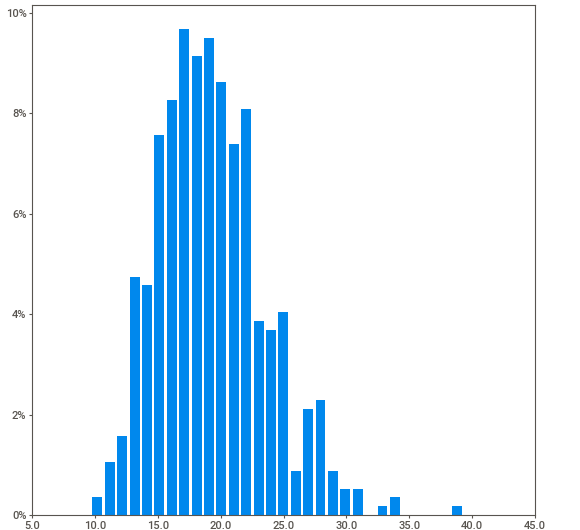
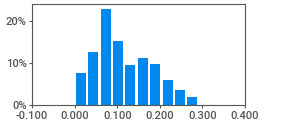
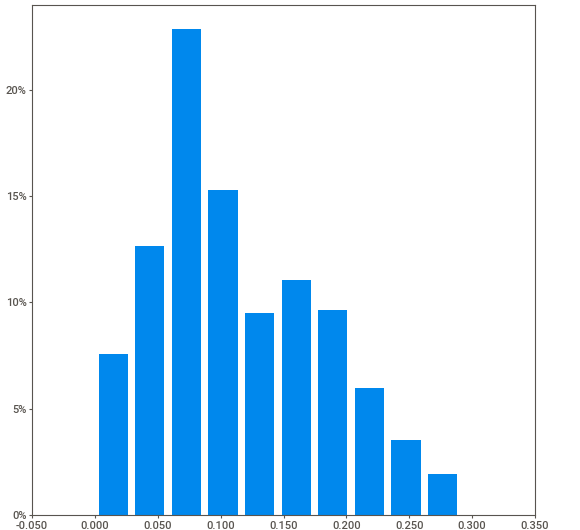
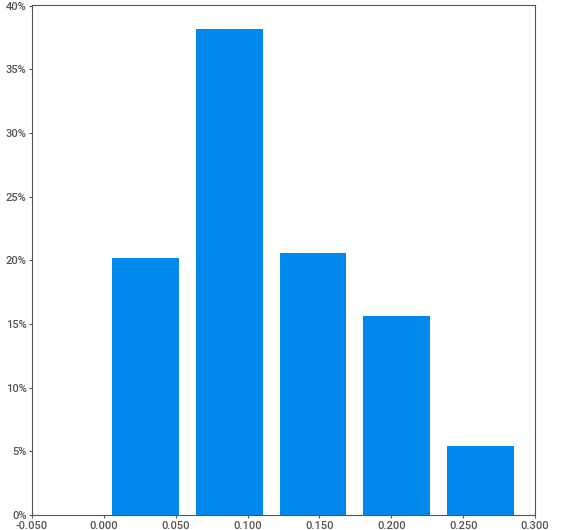
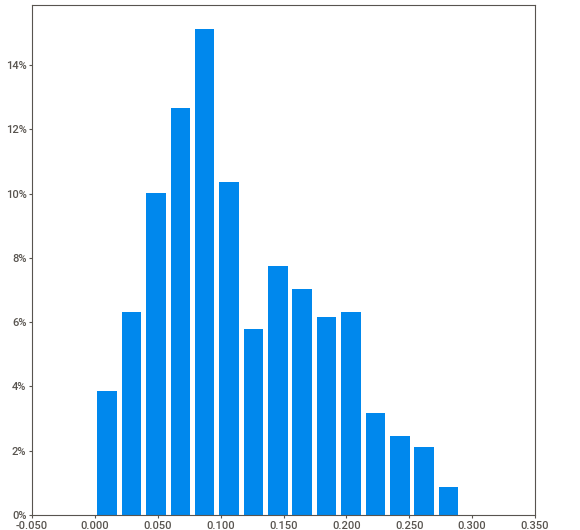
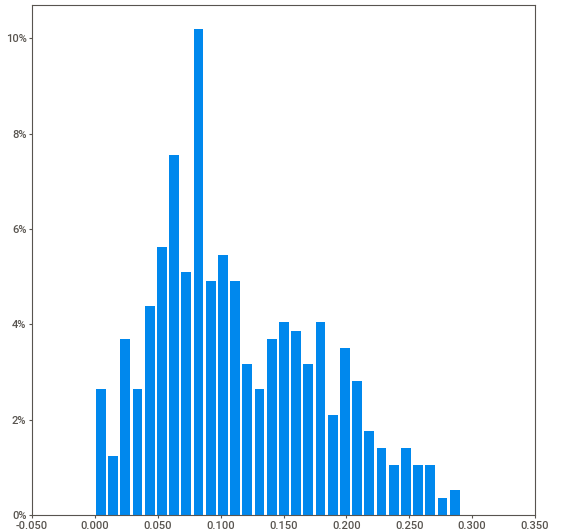
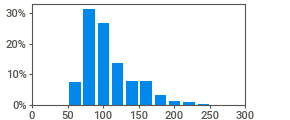
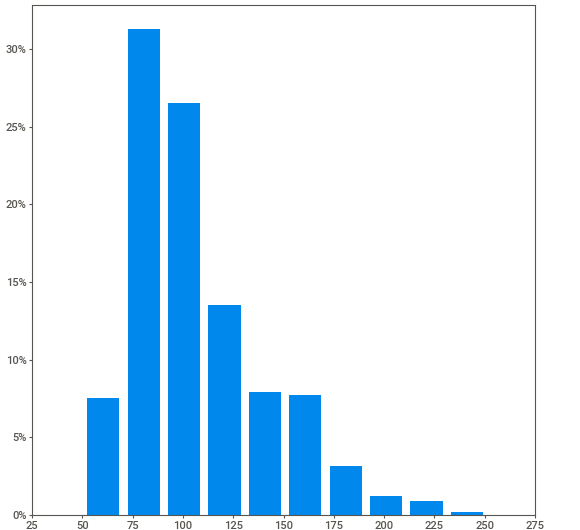
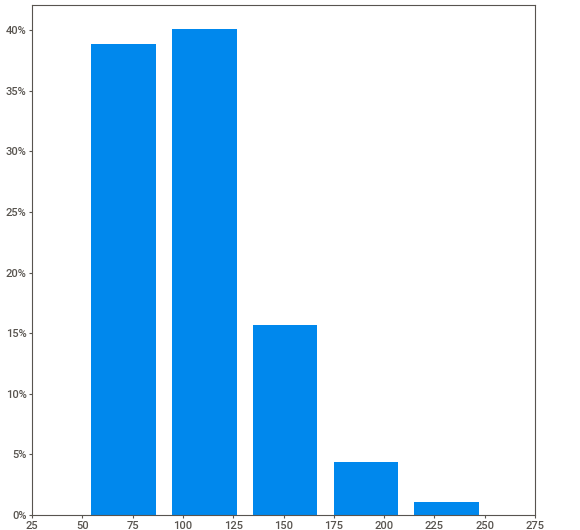
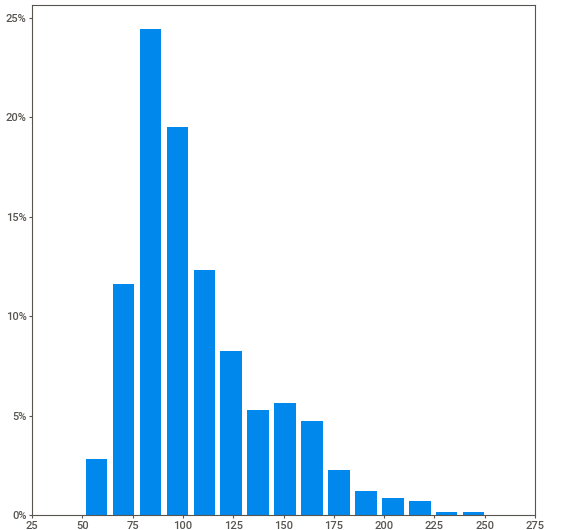
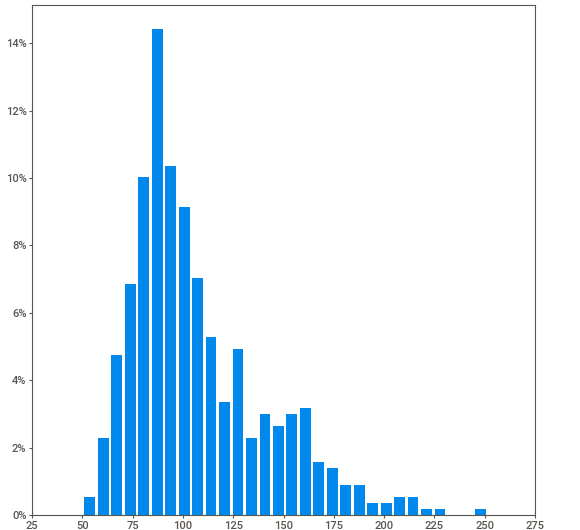
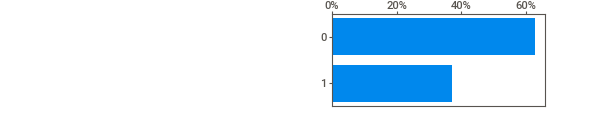
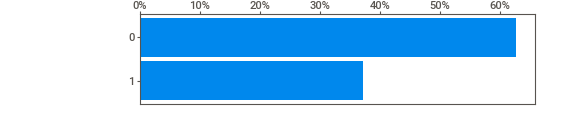
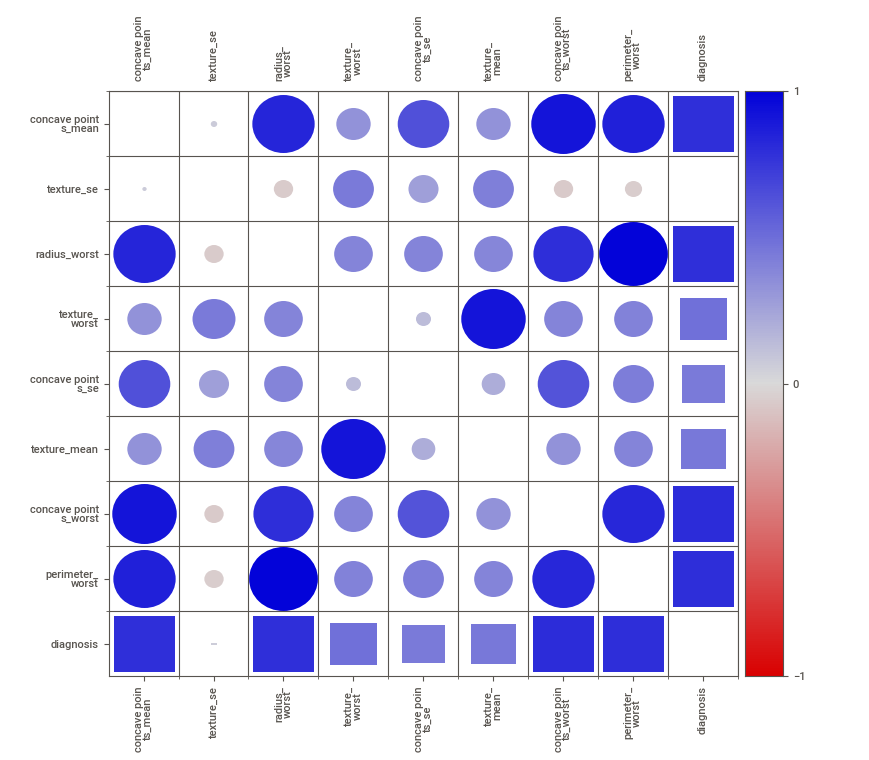
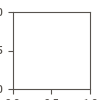

In [18]:
data_report = sv.analyze(new_data)
data_report.show_notebook() # show_html()

Text(0.5, 1.0, 'diagnosis')

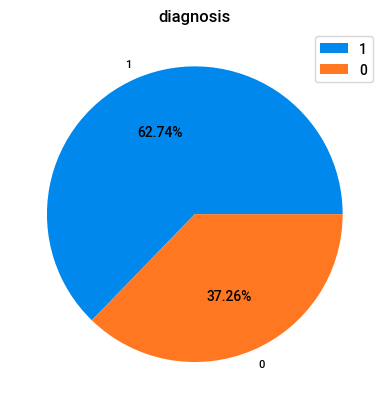

In [19]:
plt.pie(x = new_data['diagnosis'].value_counts(), labels = new_data['diagnosis'].unique(), autopct = '%1.2f%%')
plt.legend()
plt.title('diagnosis')

In [20]:
new_data.head()

,concave points_mean,texture_se,radius_worst,texture_worst,concave points_se,texture_mean,concave points_worst,perimeter_worst,diagnosis
0,0.14710,0.9053,25.38,17.33,0.01587,10.38,0.2654,184.60,1
1,0.07017,0.7339,24.99,23.41,0.01340,17.77,0.1860,158.80,1
2,0.12790,0.7869,23.57,25.53,0.02058,21.25,0.2430,152.50,1
3,0.10520,1.1560,14.91,26.50,0.01867,20.38,0.2575,98.87,1
4,0.10430,0.7813,22.54,16.67,0.01885,14.34,0.1625,152.20,1


<Axes: >

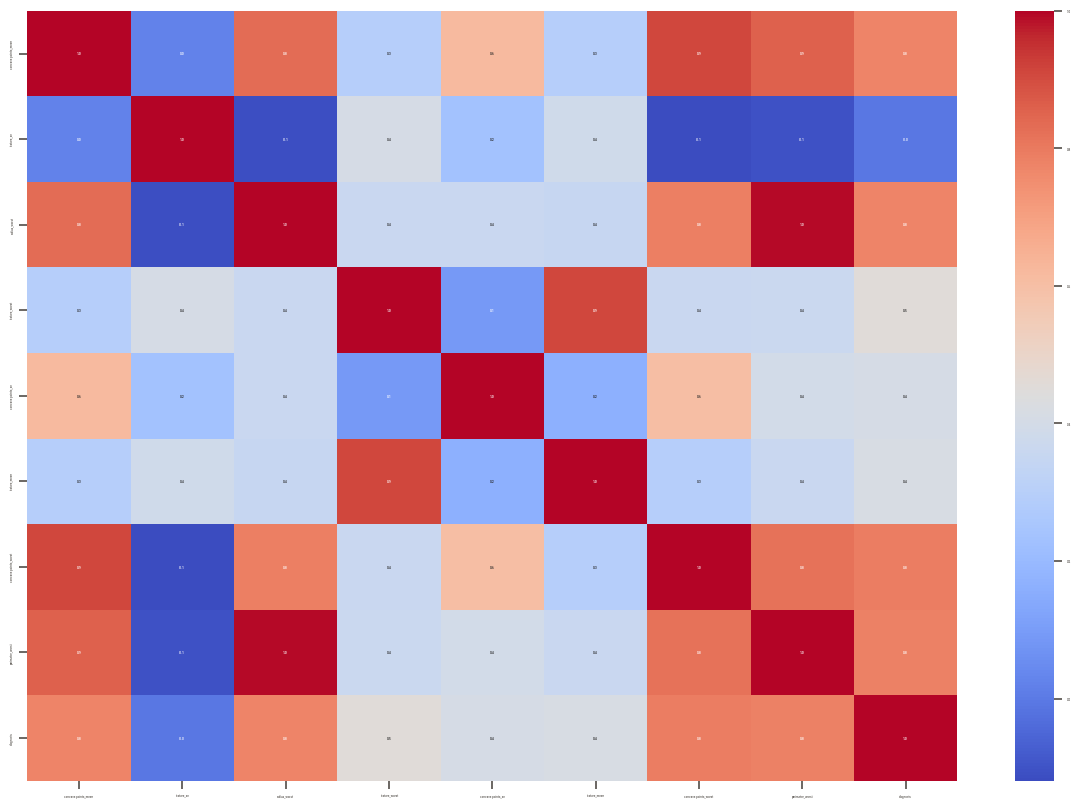

In [21]:
plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale=0.2)
sns.heatmap(new_data.corr(),annot=True,fmt=".1f",cmap="coolwarm")

## Data Preprocessing 2

In [22]:
new_data = new_data.iloc[:,:-1]
new_data.head()

,concave points_mean,texture_se,radius_worst,texture_worst,concave points_se,texture_mean,concave points_worst,perimeter_worst
0,0.14710,0.9053,25.38,17.33,0.01587,10.38,0.2654,184.60
1,0.07017,0.7339,24.99,23.41,0.01340,17.77,0.1860,158.80
2,0.12790,0.7869,23.57,25.53,0.02058,21.25,0.2430,152.50
3,0.10520,1.1560,14.91,26.50,0.01867,20.38,0.2575,98.87
4,0.10430,0.7813,22.54,16.67,0.01885,14.34,0.1625,152.20


<Axes: >

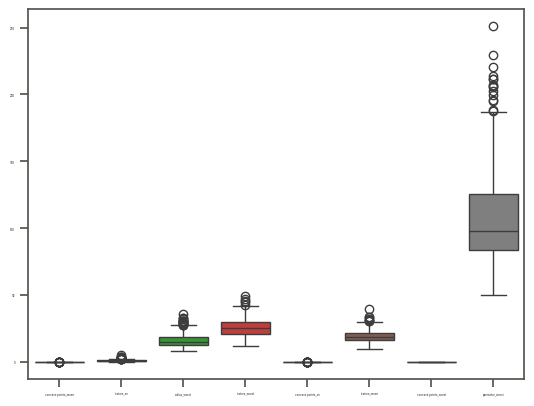

In [23]:
sns.boxplot(new_data) # Outlier removing

In [24]:
selecteed_featurers = ['perimeter_worst', 'texture_mean', 'texture_worst','radius_worst']

In [25]:
q1 = new_data[selecteed_featurers].quantile(0.25)
q3 = new_data[selecteed_featurers].quantile(0.75)
IQR = q3 - q1
th_1 = q1 - (1.5 * IQR)
th_2 = q3 + (1.5 * IQR)

In [26]:
new_data = new_data[~((new_data[selecteed_featurers] < (th_1)) |(new_data[selecteed_featurers] > (th_2))).any(axis=1)]
new_data.head()

,concave points_mean,texture_se,radius_worst,texture_worst,concave points_se,texture_mean,concave points_worst,perimeter_worst
0,0.14710,0.9053,25.38,17.33,0.01587,10.38,0.2654,184.60
1,0.07017,0.7339,24.99,23.41,0.01340,17.77,0.1860,158.80
2,0.12790,0.7869,23.57,25.53,0.02058,21.25,0.2430,152.50
3,0.10520,1.1560,14.91,26.50,0.01867,20.38,0.2575,98.87
4,0.10430,0.7813,22.54,16.67,0.01885,14.34,0.1625,152.20


<Axes: >

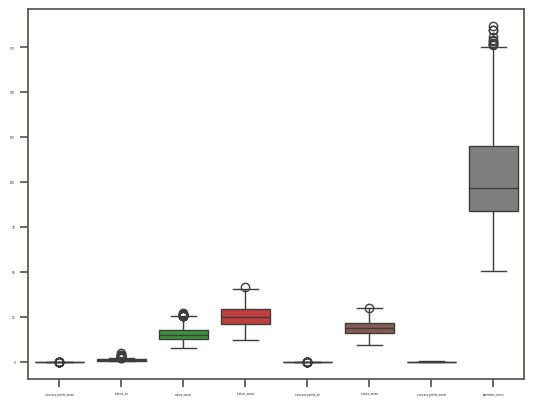

In [27]:
sns.boxplot(new_data)

In [28]:
ss = StandardScaler() # data standardizing
data = ss.fit_transform(new_data)
data = pd.DataFrame(data,columns=columns)
data = data.join(y)

In [29]:
data.head()

,concave points_mean,texture_se,radius_worst,texture_worst,concave points_se,texture_mean,concave points_worst,perimeter_worst,diagnosis
0,2.831101,-0.558620,2.274238,-1.384481,0.678125,-2.151606,2.460409,2.760351,1
1,0.672874,-0.865636,2.181419,-0.335512,0.278170,-0.316624,1.196893,1.875127,1
2,2.292456,-0.770701,1.843463,0.030248,1.440793,0.547481,2.103951,1.658967,1
3,1.655621,-0.109559,-0.217595,0.197600,1.131516,0.331455,2.334694,-0.181134,1
4,1.630372,-0.780732,1.598325,-1.498350,1.160663,-1.168314,0.822930,1.648674,1


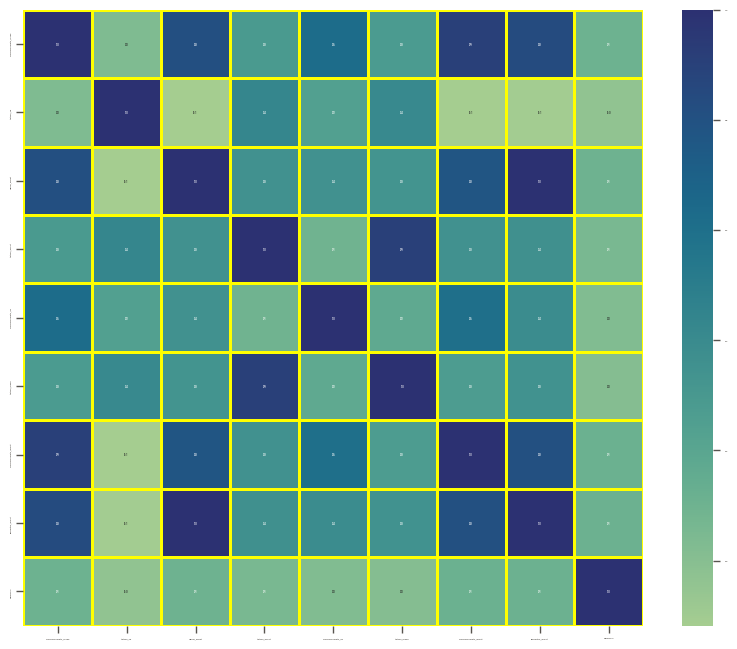

In [30]:
plt.figure(figsize=(10,8))
sns.set_context('paper',font_scale=0.2)
sns.heatmap(data.corr(),annot=True,fmt=".1f",cmap="crest",linewidths=2, linecolor='yellow',yticklabels=True)
plt.show()

<Figure size 1000x500 with 0 Axes>

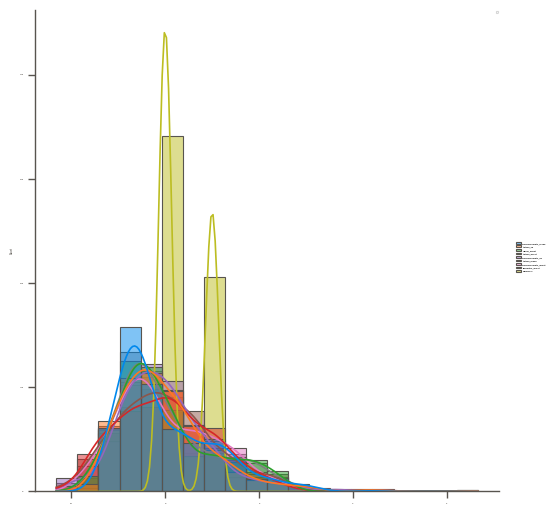

In [31]:
plt.figure(figsize=(10,5))
sns.displot(data,kde=True,bins=20);
plt.legend(loc=1)
plt.show()

## Model Building and evaluation

In [32]:
data.head()

,concave points_mean,texture_se,radius_worst,texture_worst,concave points_se,texture_mean,concave points_worst,perimeter_worst,diagnosis
0,2.831101,-0.558620,2.274238,-1.384481,0.678125,-2.151606,2.460409,2.760351,1
1,0.672874,-0.865636,2.181419,-0.335512,0.278170,-0.316624,1.196893,1.875127,1
2,2.292456,-0.770701,1.843463,0.030248,1.440793,0.547481,2.103951,1.658967,1
3,1.655621,-0.109559,-0.217595,0.197600,1.131516,0.331455,2.334694,-0.181134,1
4,1.630372,-0.780732,1.598325,-1.498350,1.160663,-1.168314,0.822930,1.648674,1


In [33]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
# LogisticRegression model
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred_l = logistic.predict(X_test)

In [37]:
score = logistic.score(X_test,y_test)

In [38]:
print(classification_report(y_true=y_test ,y_pred=y_pred_l),'\n',score)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        65
           1       1.00      0.07      0.12        45

    accuracy                           0.62       110
   macro avg       0.80      0.53      0.44       110
weighted avg       0.77      0.62      0.50       110
 
 0.6181818181818182


<ipython-input-39-a697fda11bc1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_l, color="y", label="Prediction Value")
<ipython-input-39-a697fda11bc1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,  color="g", label="Actual Value")


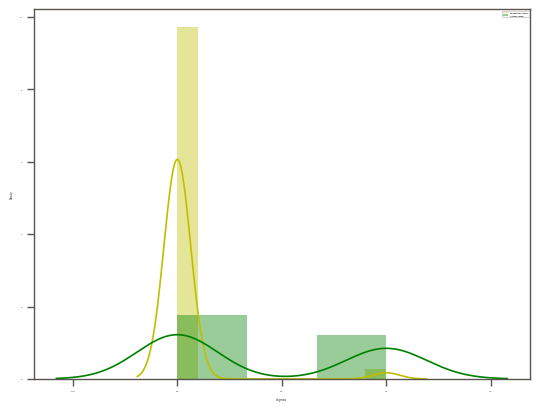

In [39]:
sns.distplot(y_pred_l, color="y", label="Prediction Value")
sns.distplot(y_test,  color="g", label="Actual Value")
plt.legend()

In [40]:
# RandomForestClassifier and uning model
rfc = RandomForestClassifier()

In [41]:
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3 ,scoring='accuracy')

grid_search.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'random_state': [0, 42]},
             scoring='accuracy')

In [42]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [43]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       random_state=42)

In [44]:
y_pred_rfc = rfc.predict(X_test)

In [45]:
rfc_score = rfc.score(X_test,y_test)

In [46]:
print(classification_report(y_true=y_test ,y_pred=y_pred_rfc),'\n',rfc_score)

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        65
           1       0.55      0.13      0.21        45

    accuracy                           0.60       110
   macro avg       0.58      0.53      0.47       110
weighted avg       0.58      0.60      0.52       110
 
 0.6


<ipython-input-47-491a2ecb7332>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_rfc, hist=False, color="r", label="Prediction Value")
<ipython-input-47-491a2ecb7332>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="g", label="Actual Value")


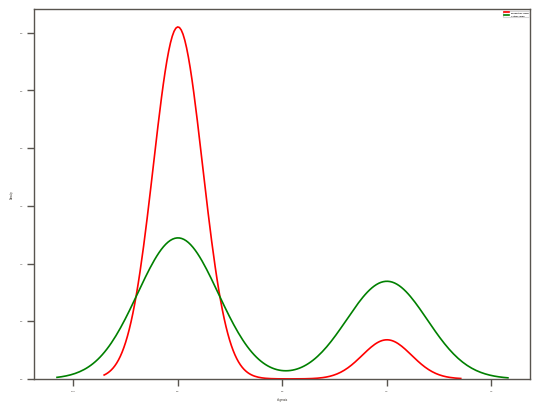

In [47]:
sns.distplot(y_pred_rfc, hist=False, color="r", label="Prediction Value")
sns.distplot(y_test, hist=False, color="g", label="Actual Value")
plt.legend()

## By using two different models and optimizing them, we reached an acceptable result for this task, but according to the results of the first model(Logistic), it had better results.